# Tools for data and metadata handling
## as used in [Brochier et al., 2018](https://www.nature.com/articles/sdata201855)
Julia Sprenger | Institut de Neurosciences de la Timone | Brainhack Marseille 2020

### Content
- [GIN](/home/julia/repositories/gin/multielectrode_grasp/code/presentation/figures/elephant_structure.png) -- for centralized data hosting and versioning
- [open metadata Markup Language (odML)](https://g-node.github.io/python-odml) -- for metadata organization
- [odMLtables](https://odmltables.readthedocs.io/en/latest/) -- for user-friendly interaction with odML
- [Neo](https://neo.readthedocs.io/en/stable/) -- for conversion and representation of ephys data
- [[Elephant]](https://elephant.readthedocs.io/en/latest/) -- for analysis of ephys data
- [[Viziphant]](https://viziphant.readthedocs.io/en/latest/) -- for visualization of ephys data

### GIN ([gin.g-node.org](gin.g-node.org)) <img align="right" src="figures/gin.png" alt="odml-logo" width="90" height="90">

- service for hosting & versioning data files
- based on git & git-annex
- public and private repositories
- DOI service for data publication
- open source; option of local setup



### [Repository of Brochier et al.](https://gin.g-node.org/INT/multielectrode_grasp)

<center>
<img src=figures/gin_int-multielectrode-grasp_screenshot.png>
</center>

###  [open metadata Markup Language (odML)](https://g-node.github.io/python-odml)  <img align="right" src="figures/odML.png" alt="odml-logo" width="90" height="90">

- framework for hierarchical structure of metadata including contextual information
- generic metadata handling, not limited to ephys
- can be exported to **xml**, json, yaml, rdf
- implemented in **Python**, java, Matlab
<center>
<img src="figures/Zehl_2016_Figure-5_modified.png" alt="odML_artistic_tree" width="800" height="600">
</center>

<font size="2">_[Figure modified from Zehl et al. 2016]_</font>

### Interacting with odML

- offline html visualization
- online visualization on the [GIN webservice](https://gin.g-node.org/), e.g. the published [metadata collection](https://gin.g-node.org/INT/multielectrode_grasp/src/enh/neo09/datasets/i140703-001.odml)
- [odML-UI](https://pypi.org/project/odML-UI/) package (not recommended)

### Example: Create a minimal metadata collection

In [16]:
import datetime
import odml

# Create odML objects
doc = odml.Document(
    author='Julia Sprenger', 
    date=datetime.date.today(),
    version=0.1, 
    repository='/my/data/repository')

section = odml.Section(
    name='Recording', 
    type='online data',
    definition='Details about the recording procedure')

property = odml.Property(
    name='Recording_Quality', 
    values='good', 
    definition='Subjective quality assessment by the experimenter ("good"/"ok"/"bad")')

# Create links between objects
doc.append(section)
section.append(property)

odml.save(doc, 'minimal_collection.odml')

### How to efficiently work with an odML metadata collection on a daily basis?

### odMLtables <img align="right" src="figures/odMLtables.svg" alt="odml-logo" width="90" height="90">
- user-friendly interaction with odML
- Python API & graphical user interface
- main feature: conversion between hierarchical odML format & tabular representation

### odMLtables: hierarchical-tabular conversion
<center><img src=https://www.frontiersin.org/files/Articles/462650/fninf-13-00062-HTML/image_m/fninf-13-00062-g004.jpg></center

### odMLtables: graphical user interface
<center><img src="https://www.frontiersin.org/files/Articles/462650/fninf-13-00062-HTML/image_m/fninf-13-00062-g005.jpg" width=600 height=600 /></center>

### Summary: metadata organization options
- custom odML structure with comprehensive documentation
- easy visualization
- programmatically and tabular accessibility


### But what to do about the primary data?
- many diverse, proprietary formats
- limited, tailored software solutions
- difficult comparison across projects

### Neo: central interface for electrophysiology data <img align="right" src="figures/neo_logo.png" alt="odml-logo" width="200" height="90">

![neo-as-interface](figures/neo_as_interface.png)


### Neo: standardized electrophysiology data representation <img align="right" src="figures/neo_logo.png" alt="odml-logo" width="200" height="90">
*Data Objects*: numpy array + essential metadata + custom annotations
<center><img align=top src=figures/neo_schematic_data_objects.svg width=60%></center>

### Neo: standardized electrophysiology data representation <img align="right" src="figures/neo_logo.png" alt="odml-logo" width="200" height="90">
*Container Objects*: provide structure and logical relations and custom annotations
<center><img src=figures/neo_schematic_complete.svg width=55%></center>


### Loading data of the publication <img align="right" src="figures/neo_logo.png" alt="odml-logo" width="200" height="90">
Here we are using Neo to load the data and inspect the standard data representation

In [1]:
import neo

# storage location of the dataset
session_path = '../../datasets/i140703-001'

# Initializing IO for Blackrock recording session
io = neo.BlackrockIO(session_path)

# Creating the complete Neo structure without loading data into memory
block = io.read_block(lazy=True)

In [26]:
import quantities as pq

# Loading data of a single recording channel
multi_trace = block.segments[0].analogsignals[1]

single_trace = multi_trace.load(
    channel_indexes=[0],
    time_slice=(0*pq.s,10*pq.s))

# inspect the AnalogSignal object
single_trace

AnalogSignal with 1 channels of length 10000; units uV; datatype float32 
name: 'chan1'
sampling rate: 1000.0 Hz
time: 0.0 s to 10.0 s

In [27]:
# Selecting spiketrains of the same channel as single recording trace
channel_id = single_trace.array_annotations['channel_ids'][0]
spiketrains = block.filter(channel_id=channel_id)

# Loading spiketrain data
spiketrains = [st.load(time_slice=(None, 10*pq.s)) for st in spiketrains]
spiketrains

[SpikeTrain
 name: 'ch1#0'
 description: 'SpikeTrain channel_id: 1, unit_id: 0'
 annotations: {'id': 'Unit 1000',
   'channel_id': 1,
   'unit_id': 0,
   'unit_tag': 'unclassified'},
 SpikeTrain
 name: 'ch1#1'
 description: 'SpikeTrain channel_id: 1, unit_id: 1'
 annotations: {'id': 'Unit 1001',
   'channel_id': 1,
   'unit_id': 1,
   'unit_tag': '1'},
 SpikeTrain
 name: 'ch1#2'
 description: 'SpikeTrain channel_id: 1, unit_id: 2'
 annotations: {'id': 'Unit 1002',
   'channel_id': 1,
   'unit_id': 2,
   'unit_tag': '2'}]

In [20]:
print(spiketrains[0])

[0.03293333 0.99996667 1.10386667 1.17866667 1.50043333 1.54853333
 3.5233     3.96836667 4.64523333 6.35246667 6.5574     9.15593333
 9.20743333] s


### Visualizing the data

Available Tools
- common Python libraries: matplotlib, seaborn
- custom visualization for data streams using neo: ephyviewer
- custom visualization for neo objects: neo-view (online), viziphant (offline)

<AxesSubplot:xlabel='Time (s)'>

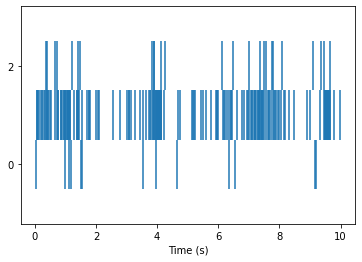

In [21]:
import viziphant
viziphant.rasterplot.eventplot(spiketrains)

Automatic calculation of simple features, e.g. the inter-spike-interval distribution (ISI)

<AxesSubplot:title={'center':'ISI distribution'}, xlabel='Inter-spike interval (s)', ylabel='Count'>

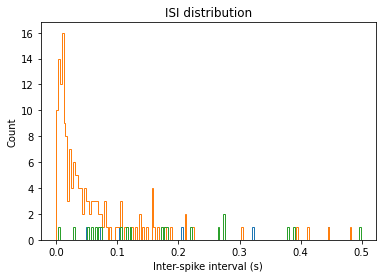

In [28]:
viziphant.statistics.plot_isi_histogram(spiketrains, cutoff=0.5*pq.s)

<center><img src="figures/elephant_structure.png" alt="elephant" width="600" height="700"></center>

### Elephant <img align="right" src="figures/elephant.png" alt="elephant-logo" width="90" height="90">

Calculating the instantaneous rate of spiketrains

In [29]:
import elephant
kernel = elephant.kernels.GaussianKernel(20*pq.ms)
rate = elephant.statistics.instantaneous_rate(spiketrains, sampling_period=100*pq.ms, kernel=kernel)
rate

AnalogSignal with 3 channels of length 99; units Hz; datatype float64 
annotations: {'t_stop': array(10.) * s,
  'kernel': {'type': 'GaussianKernel', 'sigma': '20.0 ms', 'invert': False}}
sampling rate: 0.01 1/ms
time: 0.0017 s to 9.9017 s

<AxesSubplot:xlabel='Time (ms)', ylabel='Neuron'>

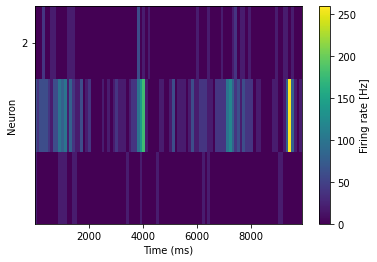

In [30]:
viziphant.statistics.plot_instantaneous_rates_colormesh(rate) 

### Summary

<center><img src=figures/summary.png width=800px height=600px></center>

### Thank your for listening!

_The datasets used in this presentation are available at https://gin.g-node.org/INT/multielectrode_grasp/_

_as well as the presentation (https://gin.g-node.org/sprenger/multielectrode_grasp/src/tool_intro/code/presentation)_


<p style="margin-bottom:5cm;"></p>

<p></p>
    
*References*
    
<font size=4>
    
- **data pulication:** Brochier et al., 2018. Massively parallel recordings in macaque motor cortex during an instructed delayed reach-to-grasp task. Scientific Data 5, 180055. https://doi.org/10.1038/sdata.2018.55
- **Neo:** https://pypi.org/project/neo/ and https://doi.org/10.3389/fninf.2014.00010
- **odML:** https://pypi.org/project/odml and https://doi.org/10.3389/fninf.2011.00016
- **NIX:** https://pypi.org/project/nixio and https://doi.org/10.3389/fninf.2014.00015
- **odMLtables** https://pypi.org/project/odmltables and https://doi.org/10.3389/fninf.2019.00062
- **elephant** https://pypi.org/project/elephant
- **viziphant** https://pypi.org/project/viziphant
    
</font>

